<a href="https://colab.research.google.com/github/sneh20122001/Pandas/blob/main/PANDAS_GROUPBY_MERGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/imdb-top-1000_19.csv')

In [ ]:
movies.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0


In [ ]:
genres = movies.groupby('Genre')

In [ ]:
# Applying builtin aggregation fuctions on groupby objects
genres.std()

<ipython-input-5-26b50a9e6e7a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  genres.std()


,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,28.500706,0.304258,432946.814748,2.256724e+08,12.421252
Adventure,33.317320,0.229781,301188.347642,1.697543e+08,12.345393
Animation,14.530471,0.253221,262173.231571,2.091840e+08,8.813646
Biography,25.514466,0.267140,271284.191372,1.363251e+08,11.028187
Comedy,22.946213,0.228771,188653.570564,1.946513e+08,11.829160
Crime,27.689231,0.335477,373999.730656,1.571191e+08,13.099102
Drama,27.740490,0.267229,305554.162841,2.201164e+08,12.744687
Family,10.606602,0.000000,137008.302816,3.048412e+08,16.970563
Fantasy,12.727922,0.141421,22179.111299,7.606861e+07,NaN


In [ ]:
# find the top 3 genres by total earning
movies.groupby('Genre')['Gross'].sum().sort_values(ascending=False).head(3)

Genre
Drama     3.540997e+10
Action    3.263226e+10
Comedy    1.566387e+10
Name: Gross, dtype: float64

In [ ]:
# find the genre with highest avg IMDB rating
movies.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(1)

Genre
Western    8.35
Name: IMDB_Rating, dtype: float64

In [ ]:
# find director with most popularity
movies.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False).head(1)

Director
Christopher Nolan    11578345
Name: No_of_Votes, dtype: int64

In [ ]:
# find the highest rated movie of each genre
movies.groupby('Genre')['IMDB_Rating'].max()

Genre
Action       9.0
Adventure    8.6
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.2
Drama        9.3
Family       7.8
Fantasy      8.1
Film-Noir    8.1
Horror       8.5
Mystery      8.4
Thriller     7.8
Western      8.8
Name: IMDB_Rating, dtype: float64

In [ ]:
# find number of movies done by each actor
movies.groupby('Star1')['Series_Title'].count().sort_values(ascending=False)

Star1
Tom Hanks             12
Robert De Niro        11
Clint Eastwood        10
Al Pacino             10
Leonardo DiCaprio      9
                      ..
Glen Hansard           1
Giuseppe Battiston     1
Giulietta Masina       1
Gerardo Taracena       1
Ömer Faruk Sorak       1
Name: Series_Title, Length: 660, dtype: int64

In [ ]:
# GroupBy Attributes and Methods
# find total number of groups -> len
# find items in each group -> size
# first()/last() -> nth item
# get_group -> vs filtering
# groups
# describe
# sample
# nunique

In [ ]:

len(movies.groupby('Genre'))

14

In [ ]:
movies['Genre'].nunique()

14

In [ ]:
movies.groupby('Genre').size()

Genre
Action       172
Adventure     72
Animation     82
Biography     88
Comedy       155
Crime        107
Drama        289
Family         2
Fantasy        2
Film-Noir      3
Horror        11
Mystery       12
Thriller       1
Western        4
dtype: int64

In [ ]:
genres = movies.groupby('Genre')
# genres.first()
# genres.last()
genres.nth(4)

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,The Lord of the Rings: The Two Towers,2002,179,8.7,Peter Jackson,Elijah Wood,1485555,342551365.0,87.0
Adventure,2001: A Space Odyssey,1968,149,8.3,Stanley Kubrick,Keir Dullea,603517,56954992.0,84.0
Animation,Spider-Man: Into the Spider-Verse,2018,117,8.4,Bob Persichetti,Peter Ramsey,375110,190241310.0,87.0
Biography,The Pianist,2002,150,8.5,Roman Polanski,Adrien Brody,729603,32572577.0,85.0
Comedy,3 Idiots,2009,170,8.4,Rajkumar Hirani,Aamir Khan,344445,6532908.0,67.0
Crime,Cidade de Deus,2002,130,8.6,Fernando Meirelles,Kátia Lund,699256,7563397.0,79.0
Drama,Soorarai Pottru,2020,153,8.6,Sudha Kongara,Suriya,54995,556832648.0,NaN
Horror,Night of the Living Dead,1968,96,7.9,George A. Romero,Duane Jones,116557,89029.0,89.0
Mystery,Kahaani,2012,122,8.1,Sujoy Ghosh,Vidya Balan,57806,1035953.0,NaN


In [ ]:
movies['Genre'].value_counts()

Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: Genre, dtype: int64

In [ ]:
genres.get_group('Fantasy')

movies[movies['Genre'] == 'Fantasy']

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
321,Das Cabinet des Dr. Caligari,1920,76,Fantasy,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN
568,Nosferatu,1922,94,Fantasy,7.9,F.W. Murnau,Max Schreck,88794,445151978.0,NaN


In [ ]:
genres.groups

{'Action': [2, 5, 8, 10, 13, 14, 16, 29, 30, 31, 39, 42, 44, 55, 57, 59, 60, 63, 68, 72, 106, 109, 129, 130, 134, 140, 142, 144, 152, 155, 160, 161, 166, 168, 171, 172, 177, 181, 194, 201, 202, 216, 217, 223, 224, 236, 241, 262, 275, 294, 308, 320, 325, 326, 331, 337, 339, 340, 343, 345, 348, 351, 353, 356, 357, 362, 368, 369, 375, 376, 390, 410, 431, 436, 473, 477, 479, 482, 488, 493, 496, 502, 507, 511, 532, 535, 540, 543, 564, 569, 570, 573, 577, 582, 583, 602, 605, 608, 615, 623, ...], 'Adventure': [21, 47, 93, 110, 114, 116, 118, 137, 178, 179, 191, 193, 209, 226, 231, 247, 267, 273, 281, 300, 301, 304, 306, 323, 329, 361, 366, 377, 402, 406, 415, 426, 458, 470, 497, 498, 506, 513, 514, 537, 549, 552, 553, 566, 576, 604, 609, 618, 638, 647, 675, 681, 686, 692, 711, 713, 739, 755, 781, 797, 798, 851, 873, 884, 912, 919, 947, 957, 964, 966, 984, 991], 'Animation': [23, 43, 46, 56, 58, 61, 66, 70, 101, 135, 146, 151, 158, 170, 197, 205, 211, 213, 219, 229, 230, 242, 245, 246, 270, 33

In [ ]:
genres.describe()

Runtime                                                              \
            count        mean        std    min     25%    50%     75%    max   
Genre                                                                           
Action      172.0  129.046512  28.500706   45.0  110.75  127.5  143.25  321.0   
Adventure    72.0  134.111111  33.317320   88.0  109.00  127.0  149.00  228.0   
Animation    82.0   99.585366  14.530471   71.0   90.00   99.5  106.75  137.0   
Biography    88.0  136.022727  25.514466   93.0  120.00  129.0  146.25  209.0   
Comedy      155.0  112.129032  22.946213   68.0   96.00  106.0  124.50  188.0   
Crime       107.0  126.392523  27.689231   80.0  106.50  122.0  141.50  229.0   
Drama       289.0  124.737024  27.740490   64.0  105.00  121.0  137.00  242.0   
Family        2.0  107.500000  10.606602  100.0  103.75  107.5  111.25  115.0   
Fantasy       2.0   85.000000  12.727922   76.0   80.50   85.0   89.50   94.0   
Film-Noir     3.0  104.000000   4.000000  100.0  102.00  104.0  106.00  108.0   
Horror       11.0  102.090909  13.604812   71.0   98.00  103.0  109.00  122.0   
Mystery      12.0  119.083333  14.475423   96.0  110.75  117.5  130.25  138.0   
Thriller      1.0  108.000000        NaN  108.0  108.00  108.0  108.00  108.0   
Western       4.0  148.250000  17.153717  132.0  134.25  148.0  162.00  165.0   

          IMDB_Rating            ...         Gross              Metascore  \
                count      mean  ...           75%          max     count   
Genre                            ...                                        
Action          172.0  7.949419  ...  2.674437e+08  936662225.0     143.0   
Adventure        72.0  7.937500  ...  1.998070e+08  874211619.0      64.0   
Animation        82.0  7.930488  ...  2.520612e+08  873839108.0      75.0   
Biography        88.0  7.938636  ...  9.829924e+07  753585104.0      79.0   
Comedy          155.0  7.901290  ...  8.107809e+07  886752933.0     125.0   
Crime           107.0  8.016822  ...  7.102163e+07  790482117.0      87.0   
Drama           289.0  7.957439  ...  1.164461e+08  924558264.0     241.0   
Family            2.0  7.800000  ...  3.273329e+08  435110554.0       2.0   
Fantasy           2.0  8.000000  ...  4.182577e+08  445151978.0       0.0   
Film-Noir         3.0  7.966667  ...  6.273068e+07  123353292.0       3.0   
Horror           11.0  7.909091  ...  1.362817e+08  298791505.0      11.0   
Mystery          12.0  7.975000  ...  1.310949e+08  474203697.0       8.0   
Thriller          1.0  7.800000  ...  1.755074e+07   17550741.0       1.0   
Western           4.0  8.350000  ...  1.920000e+07   31800000.0       4.0   

                                                                  
                mean        std   min    25%   50%    75%    max  
Genre                                                             
Action     73.419580  12.421252  33.0  65.00  74.0  82.00   98.0  
Adventure  78.437500  12.345393  41.0  69.75  80.5  87.25  100.0  
Animation  81.093333   8.813646  61.0  75.00  82.0  87.50   96.0  
Biography  76.240506  11.028187  48.0  70.50  76.0  84.50   97.0  
Comedy     78.720000  11.829160  45.0  72.00  79.0  88.00   99.0  
Crime      77.080460  13.099102  47.0  69.50  77.0  87.00  100.0  
Drama      79.701245  12.744687  28.0  72.00  82.0  89.00  100.0  
Family     79.000000  16.970563  67.0  73.00  79.0  85.00   91.0  
Fantasy          NaN        NaN   NaN    NaN   NaN    NaN    NaN  
Film-Noir  95.666667   1.527525  94.0  95.00  96.0  96.50   97.0  
Horror     80.000000  15.362291  46.0  77.50  87.0  88.50   97.0  
Mystery    79.125000  18.604435  52.0  65.25  77.0  98.50  100.0  
Thriller   81.000000        NaN  81.0  81.00  81.0  81.00   81.0  
Western    78.250000   9.032349  69.0  72.75  77.0  82.50   90.0  

[14 rows x 40 columns]

In [ ]:
genres.sample(2,replace = True)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
852,The French Connection,1971,104,Action,7.7,William Friedkin,Gene Hackman,110075,15630710.0,94.0
161,"Lock, Stock and Two Smoking Barrels",1998,107,Action,8.2,Guy Ritchie,Jason Flemyng,535216,3897569.0,66.0
110,Das Boot,1981,149,Adventure,8.3,Wolfgang Petersen,Jürgen Prochnow,231855,11487676.0,86.0
797,"O Brother, Where Art Thou?",2000,107,Adventure,7.7,Joel Coen,Ethan Coen,286742,45512588.0,69.0
640,Les triplettes de Belleville,2003,80,Animation,7.8,Sylvain Chomet,Michèle Caucheteux,50622,7002255.0,91.0
66,WALL·E,2008,98,Animation,8.4,Andrew Stanton,Ben Burtt,999790,223808164.0,95.0
673,Glory,1989,122,Biography,7.8,Edward Zwick,Matthew Broderick,122779,26830000.0,78.0
657,Ed Wood,1994,127,Biography,7.8,Tim Burton,Johnny Depp,164937,5887457.0,70.0
826,Barton Fink,1991,116,Comedy,7.7,Joel Coen,Ethan Coen,113240,6153939.0,69.0
848,Blazing Saddles,1974,93,Comedy,7.7,Mel Brooks,Cleavon Little,125993,119500000.0,73.0


In [ ]:
genres.nunique()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,172,61,78,15,123,121,172,172,50
Adventure,72,49,58,10,59,59,72,72,33
Animation,82,35,41,11,51,77,82,82,29
Biography,88,44,56,13,76,72,88,88,40
Comedy,155,72,70,11,113,133,155,155,44
Crime,106,56,65,14,86,85,107,107,39
Drama,289,83,95,14,211,250,288,287,52
Family,2,2,2,1,2,2,2,2,2
Fantasy,2,2,2,2,2,2,2,2,0


In [ ]:
# agg method
# passing dict
genres.agg(
    {
        'Runtime':'mean',
        'IMDB_Rating':'mean',
        'No_of_Votes':'sum',
        'Gross':'sum',
        'Metascore':'min'
    }
)

,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,129.046512,7.949419,72282412,3.263226e+10,33.0
Adventure,134.111111,7.937500,22576163,9.496922e+09,41.0
Animation,99.585366,7.930488,21978630,1.463147e+10,61.0
Biography,136.022727,7.938636,24006844,8.276358e+09,48.0
Comedy,112.129032,7.901290,27620327,1.566387e+10,45.0
Crime,126.392523,8.016822,33533615,8.452632e+09,47.0
Drama,124.737024,7.957439,61367304,3.540997e+10,28.0
Family,107.500000,7.800000,551221,4.391106e+08,67.0
Fantasy,85.000000,8.000000,146222,7.827267e+08,NaN


In [ ]:
# passing list
genres.agg(['min','max','mean','sum'])

<ipython-input-51-2fcb02b351d2>:2: FutureWarning: ['Series_Title', 'Released_Year', 'Director', 'Star1'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  genres.agg(['min','max','mean','sum'])


Runtime                         IMDB_Rating                         \
              min  max        mean    sum         min  max      mean     sum   
Genre                                                                          
Action         45  321  129.046512  22196         7.6  9.0  7.949419  1367.3   
Adventure      88  228  134.111111   9656         7.6  8.6  7.937500   571.5   
Animation      71  137   99.585366   8166         7.6  8.6  7.930488   650.3   
Biography      93  209  136.022727  11970         7.6  8.9  7.938636   698.6   
Comedy         68  188  112.129032  17380         7.6  8.6  7.901290  1224.7   
Crime          80  229  126.392523  13524         7.6  9.2  8.016822   857.8   
Drama          64  242  124.737024  36049         7.6  9.3  7.957439  2299.7   
Family        100  115  107.500000    215         7.8  7.8  7.800000    15.6   
Fantasy        76   94   85.000000    170         7.9  8.1  8.000000    16.0   
Film-Noir     100  108  104.000000    312         7.8  8.1  7.966667    23.9   
Horror         71  122  102.090909   1123         7.6  8.5  7.909091    87.0   
Mystery        96  138  119.083333   1429         7.6  8.4  7.975000    95.7   
Thriller      108  108  108.000000    108         7.8  7.8  7.800000     7.8   
Western       132  165  148.250000    593         7.8  8.8  8.350000    33.4   

          No_of_Votes                                          Gross  \
                  min      max           mean       sum          min   
Genre                                                                  
Action          25312  2303232  420246.581395  72282412       3296.0   
Adventure       29999  1512360  313557.819444  22576163      61001.0   
Animation       25229   999790  268032.073171  21978630     128985.0   
Biography       27254  1213505  272805.045455  24006844      21877.0   
Comedy          26337   939631  178195.658065  27620327       1305.0   
Crime           27712  1826188  313398.271028  33533615       6013.0   
Drama           25088  2343110  212343.612457  61367304       3600.0   
Family         178731   372490  275610.500000    551221    4000000.0   
Fantasy         57428    88794   73111.000000    146222  337574718.0   
Film-Noir       59556   158731  122405.000000    367215     449191.0   
Horror          27007   787806  340232.363636   3742556      89029.0   
Mystery         33982  1129894  350250.333333   4203004    1035953.0   
Thriller        27733    27733   27733.000000     27733   17550741.0   
Western         65659   688390  322416.250000   1289665    5321508.0   

                                                   Metascore         \
                   max          mean           sum       min    max   
Genre                                                                 
Action     936662225.0  1.897224e+08  3.263226e+10      33.0   98.0   
Adventure  874211619.0  1.319017e+08  9.496922e+09      41.0  100.0   
Animation  873839108.0  1.784326e+08  1.463147e+10      61.0   96.0   
Biography  753585104.0  9.404952e+07  8.276358e+09      48.0   97.0   
Comedy     886752933.0  1.010572e+08  1.566387e+10      45.0   99.0   
Crime      790482117.0  7.899656e+07  8.452632e+09      47.0  100.0   
Drama      924558264.0  1.225259e+08  3.540997e+10      28.0  100.0   
Family     435110554.0  2.195553e+08  4.391106e+08      67.0   91.0   
Fantasy    445151978.0  3.913633e+08  7.827267e+08       NaN    NaN   
Film-Noir  123353292.0  4.197018e+07  1.259105e+08      94.0   97.0   
Horror     298791505.0  9.405902e+07  1.034649e+09      46.0   97.0   
Mystery    474203697.0  1.047014e+08  1.256417e+09      52.0  100.0   
Thriller    17550741.0  1.755074e+07  1.755074e+07      81.0   81.0   
Western     31800000.0  1.455538e+07  5.822151e+07      69.0   90.0   

                               
                mean      sum  
Genre                          
Action     73.419580  10499.0  
Adventure  78.437500   5020.0  
Animation  81.093333   6082.0  
Biography  76.240506   6

In [ ]:
# Adding both the syntax
genres.agg(
    {
        'Runtime':['min','mean'],
        'IMDB_Rating':'mean',
        'No_of_Votes':['sum','max'],
        'Gross':'sum',
        'Metascore':'min'
    }
)

Runtime             IMDB_Rating No_of_Votes                  Gross  \
              min        mean        mean         sum      max           sum   
Genre                                                                          
Action         45  129.046512    7.949419    72282412  2303232  3.263226e+10   
Adventure      88  134.111111    7.937500    22576163  1512360  9.496922e+09   
Animation      71   99.585366    7.930488    21978630   999790  1.463147e+10   
Biography      93  136.022727    7.938636    24006844  1213505  8.276358e+09   
Comedy         68  112.129032    7.901290    27620327   939631  1.566387e+10   
Crime          80  126.392523    8.016822    33533615  1826188  8.452632e+09   
Drama          64  124.737024    7.957439    61367304  2343110  3.540997e+10   
Family        100  107.500000    7.800000      551221   372490  4.391106e+08   
Fantasy        76   85.000000    8.000000      146222    88794  7.827267e+08   
Film-Noir     100  104.000000    7.966667      367215   158731  1.259105e+08   
Horror         71  102.090909    7.909091     3742556   787806  1.034649e+09   
Mystery        96  119.083333    7.975000     4203004  1129894  1.256417e+09   
Thriller      108  108.000000    7.800000       27733    27733  1.755074e+07   
Western       132  148.250000    8.350000     1289665   688390  5.822151e+07   

          Metascore  
                min  
Genre                
Action         33.0  
Adventure      41.0  
Animation      61.0  
Biography      48.0  
Comedy         45.0  
Crime          47.0  
Drama          28.0  
Family         67.0  
Fantasy         NaN  
Film-Noir      94.0  
Horror         46.0  
Mystery        52.0  
Thriller       81.0  
Western        69.0

In [ ]:
# looping on groups
df = pd.DataFrame(columns = movies.columns)
for group,data in genres:
  df = df.append(data[data['IMDB_Rating'] == data['IMDB_Rating'].max()])

df

<ipython-input-55-db30e980e598>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(data[data['IMDB_Rating'] == data['IMDB_Rating'].max()])
<ipython-input-55-db30e980e598>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(data[data['IMDB_Rating'] == data['IMDB_Rating'].max()])
<ipython-input-55-db30e980e598>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(data[data['IMDB_Rating'] == data['IMDB_Rating'].max()])
<ipython-input-55-db30e980e598>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df= df.append(data[data['IMDB_Rating'] == data['IMDB_Rating'].max()])
<ipython-input-55-db30e980e598>:4: Futur

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
21,Interstellar,2014,169,Adventure,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
23,Sen to Chihiro no kamikakushi,2001,125,Animation,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
7,Schindler's List,1993,195,Biography,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
19,Gisaengchung,2019,132,Comedy,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0
26,La vita è bella,1997,116,Comedy,8.6,Roberto Benigni,Roberto Benigni,623629,57598247.0,59.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
688,E.T. the Extra-Terrestrial,1982,115,Family,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
698,Willy Wonka & the Chocolate Factory,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0


In [ ]:
# split (apply) combine
# apply -> builtin function

genres.apply(min)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,,
Action,300,1924,45,Action,7.6,Abhishek Chaubey,Aamir Khan,25312,3296.0,NaN
Adventure,2001: A Space Odyssey,1925,88,Adventure,7.6,Akira Kurosawa,Aamir Khan,29999,61001.0,NaN
Animation,Akira,1940,71,Animation,7.6,Adam Elliot,Adrian Molina,25229,128985.0,NaN
Biography,12 Years a Slave,1928,93,Biography,7.6,Adam McKay,Adrien Brody,27254,21877.0,NaN
Comedy,(500) Days of Summer,1921,68,Comedy,7.6,Alejandro G. Iñárritu,Aamir Khan,26337,1305.0,NaN
Crime,12 Angry Men,1931,80,Crime,7.6,Akira Kurosawa,Ajay Devgn,27712,6013.0,NaN
Drama,1917,1925,64,Drama,7.6,Aamir Khan,Abhay Deol,25088,3600.0,NaN
Family,E.T. the Extra-Terrestrial,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,Fantasy,7.9,F.W. Murnau,Max Schreck,57428,337574718.0,NaN


In [ ]:
# find number of movies starting with A for each group

def foo(group):
  return group['Series_Title'].str.startswith('A').sum()

In [ ]:
genres.apply(foo)

Genre
Action       10
Adventure     2
Animation     2
Biography     9
Comedy       14
Crime         4
Drama        21
Family        0
Fantasy       0
Film-Noir     0
Horror        1
Mystery       0
Thriller      0
Western       0
dtype: int64

In [ ]:
# find ranking of each movie in the group according to IMDB score

def rank_movie(group):
  group['genre_rank'] = group['IMDB_Rating'].rank(ascending = False)
  return group

In [ ]:
genres.apply(rank_movie)

<ipython-input-63-ba7147e2ecdc>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  genres.apply(rank_movie)


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore,genre_rank
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0,1.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0,1.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0,1.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0,2.5
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0,2.5
...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,Comedy,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0,147.0
996,Giant,1956,201,Drama,7.6,George Stevens,Elizabeth Taylor,34075,195217415.0,84.0,272.5
997,From Here to Eternity,1953,118,Drama,7.6,Fred Zinnemann,Burt Lancaster,43374,30500000.0,85.0,272.5
998,Lifeboat,1944,97,Drama,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0,272.5


In [ ]:
# find normalized IMDB rating group wise

def normal(group):
  group['norm_rating'] = (group['IMDB_Rating'] - group['IMDB_Rating'].min())/(group['IMDB_Rating'].max() - group['IMDB_Rating'].min())
  return group

genres.apply(normal)

<ipython-input-64-7e237221fbce>:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  genres.apply(normal)


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore,norm_rating
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0,1.000
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0,1.000
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0,1.000
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0,0.875
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0,0.875
...,...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,Comedy,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0,0.000
996,Giant,1956,201,Drama,7.6,George Stevens,Elizabeth Taylor,34075,195217415.0,84.0,0.000
997,From Here to Eternity,1953,118,Drama,7.6,Fred Zinnemann,Burt Lancaster,43374,30500000.0,85.0,0.000
998,Lifeboat,1944,97,Drama,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0,0.000


In [ ]:
# groupby on multiple cols
duo = movies.groupby(['Director','Star1'])
duo
# size
duo.size()
# get_group
duo.get_group(('Aamir Khan','Amole Gupte'))

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
65,Taare Zameen Par,2007,165,Drama,8.4,Aamir Khan,Amole Gupte,168895,1223869.0,NaN


In [ ]:
# find the most earning actor->director combo
duo['Gross'].sum().sort_values(ascending=False).head(1)

Director        Star1         
Akira Kurosawa  Toshirô Mifune    2.999877e+09
Name: Gross, dtype: float64

In [ ]:
# find the best(in-terms of metascore(avg)) actor->genre combo
movies.groupby(['Star1','Genre'])['Metascore'].mean().reset_index().sort_values('Metascore',ascending=False).head(1)

,Star1,Genre,Metascore
230,Ellar Coltrane,Drama,100.0


In [ ]:
# agg on multiple groupby
duo.agg(['min','max','mean'])

<ipython-input-68-adac69a254a9>:2: FutureWarning: ['Series_Title', 'Released_Year', 'Genre'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  duo.agg(['min','max','mean'])


Runtime             IMDB_Rating            \
                                       min  max   mean         min  max mean   
Director            Star1                                                      
Aamir Khan          Amole Gupte        165  165  165.0         8.4  8.4  8.4   
Aaron Sorkin        Eddie Redmayne     129  129  129.0         7.8  7.8  7.8   
Abdellatif Kechiche Léa Seydoux        180  180  180.0         7.7  7.7  7.7   
Abhishek Chaubey    Shahid Kapoor      148  148  148.0         7.8  7.8  7.8   
Abhishek Kapoor     Amit Sadh          130  130  130.0         7.7  7.7  7.7   
...                                    ...  ...    ...         ...  ...  ...   
Zaza Urushadze      Lembit Ulfsak       87   87   87.0         8.2  8.2  8.2   
Zoya Akhtar         Hrithik Roshan     155  155  155.0         8.1  8.1  8.1   
                    Vijay Varma        154  154  154.0         8.0  8.0  8.0   
Çagan Irmak         Çetin Tekindor     112  112  112.0         8.3  8.3  8.3   
Ömer Faruk Sorak    Cem Yilmaz         127  127  127.0         8.0  8.0  8.0   

                                   No_of_Votes                          Gross  \
                                           min     max      mean          min   
Director            Star1                                                       
Aamir Khan          Amole Gupte         168895  168895  168895.0    1223869.0   
Aaron Sorkin        Eddie Redmayne       89896   89896   89896.0  853090410.0   
Abdellatif Kechiche Léa Seydoux         138741  138741  138741.0    2199675.0   
Abhishek Chaubey    Shahid Kapoor        27175   27175   27175.0  218428303.0   
Abhishek Kapoor     Amit Sadh            32628   32628   32628.0    1122527.0   
...                                        ...     ...       ...          ...   
Zaza Urushadze      Lembit Ulfsak        40382   40382   40382.0     144501.0   
Zoya Akhtar         Hrithik Roshan       67927   67927   67927.0    3108485.0   
                    Vijay Varma          31886   31886   31886.0    5566534.0   
Çagan Irmak         Çetin Tekindor       78925   78925   78925.0  461855363.0   
Ömer Faruk Sorak    Cem Yilmaz           56960   56960   56960.0  196206077.0   

                                                             Metascore        \
                                            max         mean       min   max   
Director            Star1                                                      
Aamir Khan          Amole Gupte       1223869.0    1223869.0       NaN   NaN   
Aaron Sorkin        Eddie Redmayne  853090410.0  853090410.0      77.0  77.0   
Abdellatif Kechiche Léa Seydoux       2199675.0    2199675.0      89.0  89.0   
Abhishek Chaubey    Shahid Kapoor   218428303.0  218428303.0       NaN   NaN   
Abhishek Kapoor     Amit Sadh         1122527.0    1122527.0      40.0  40.0   
...                                         ...          ...       ...   ...   
Zaza Urushadze      Lembit Ulfsak      144501.0     144501.0      73.0  73.0   
Zoya Akhtar         Hrithik Roshan    3108485.0    3108485.0       NaN   NaN   
                    Vijay Varma       5566534.0    5566534.0      65.0  65.0   
Çagan Irmak         Çetin Tekindor  461855363.0  461855363.0       NaN   NaN   
Ömer Faruk Sorak    Cem Yilmaz      196206077.0  196206077.0       NaN   NaN   

                                          
                                    mean  
Director            Star1                 
Aamir Khan          Amole Gupte      NaN  
Aaron Sorkin        Eddie Redmayne  77.0  
Abdellatif Kechiche Léa Seydoux     89.0  
Abhishek Chaubey    Shahid Kapoor    NaN  
Abhishek Kapoor     Amit Sadh       40.0  
...                                  ...  
Zaza Urushadze      Lembit Ulfsak   73.0  
Zoya Akhtar         Hrithik Roshan   NaN  
                    Vijay Varma     65.0  
Çagan Irmak         Çetin Tekindor   NaN  
Ömer Faruk Sorak    Cem Yilmaz       NaN  

[898 rows x 15 columns]

##Excercise

In [ ]:
ipl = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deliveries_19.csv')
ipl.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
ipl.shape

(179078, 21)

In [ ]:
# find the top 10 batsman in terms of runs
ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

In [ ]:
# find the batsman with max no of sixes
six = ipl[ipl['batsman_runs'] == 6]

six.groupby('batsman')['batsman'].count().sort_values(ascending=False).head(1).index[0]

'CH Gayle'

In [ ]:
# find batsman with most number of 4's and 6's in last 5 overs
temp_df = ipl[ipl['over'] > 15]
temp_df = temp_df[(temp_df['batsman_runs'] == 4) | (temp_df['batsman_runs'] == 6)]
temp_df.groupby('batsman')['batsman'].count().sort_values(ascending=False).head(1).index[0]

'MS Dhoni'

In [ ]:
# find V Kohli's record against all teams
temp_df = ipl[ipl['batsman'] == 'V Kohli']

temp_df.groupby('bowling_team')['batsman_runs'].sum().reset_index()

,bowling_team,batsman_runs
0,Chennai Super Kings,749
1,Deccan Chargers,306
2,Delhi Capitals,66
3,Delhi Daredevils,763
4,Gujarat Lions,283
5,Kings XI Punjab,636
6,Kochi Tuskers Kerala,50
7,Kolkata Knight Riders,675
8,Mumbai Indians,628
9,Pune Warriors,128


In [ ]:
# Create a function that can return the highest score of any batsman
temp_df = ipl[ipl['batsman'] == 'V Kohli']
temp_df.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=False).head(1).values[0]

def highest(batsman):
  temp_df = ipl[ipl['batsman'] == batsman]
  return temp_df.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=False).head(1).values[0]


In [ ]:
highest('DA Warner')

126

#PANDAS 20

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
courses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/courses_20.csv')
students = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_20.csv')
nov = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reg-month1_20.csv')
dec = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/reg-month2_20.csv')

matches = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/matches_20.csv')
delivery = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/deliveries_19.csv')

In [ ]:
dec

,student_id,course_id
0,3,5
1,16,7
2,12,10
3,12,1
4,14,9
5,7,7
6,7,2
7,16,3
8,17,10
9,11,8


In [ ]:
# pd.concat
# df.concat
# ignore_index
# df.append
# mullitindex -> fetch using iloc
# concat dataframes horizontally

In [ ]:
regs = pd.concat([nov,dec],ignore_index=True)
regs

,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [ ]:
nov.append(dec,ignore_index=True)

<ipython-input-89-e9e24edf2237>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  nov.append(dec,ignore_index=True)


,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9
5,18,1
6,1,1
7,7,8
8,22,3
9,15,1


In [ ]:
multi = pd.concat([nov,dec],keys=['Nov','Dec'])
# Multiindex DataFrame
multi.loc[('Dec',4)]

student_id    14
course_id      9
Name: (Dec, 4), dtype: int64

In [ ]:
pd.concat([nov,dec],axis=1)

,student_id,course_id,student_id,course_id
0,23.0,1.0,3,5
1,15.0,5.0,16,7
2,18.0,6.0,12,10
3,23.0,4.0,12,1
4,16.0,9.0,14,9
5,18.0,1.0,7,7
6,1.0,1.0,7,2
7,7.0,8.0,16,3
8,22.0,3.0,17,10
9,15.0,1.0,11,8


In [ ]:
# inner join
students.merge(regs,how='inner',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [ ]:
# left join
courses.merge(regs,how='left',on='course_id')

,course_id,course_name,price,student_id
0,1,python,2499,23.0
1,1,python,2499,18.0
2,1,python,2499,1.0
3,1,python,2499,15.0
4,1,python,2499,21.0
5,1,python,2499,25.0
6,1,python,2499,12.0
7,1,python,2499,14.0
8,1,python,2499,38.0
9,2,sql,3499,19.0


In [ ]:
# right join
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})

students = pd.concat([students,temp_df],ignore_index=True)
students.tail()

,student_id,name,partner
23,24,Radhika Suri,17
24,25,Shashank D’Alia,2
25,26,Nitish,28
26,27,Ankit,26
27,28,Rahul,17


In [ ]:
students.merge(regs,how='right',on='student_id')

,student_id,name,partner,course_id
0,23,Chhavi Lachman,18.0,1
1,15,Preet Sha,16.0,5
2,18,Fardeen Mahabir,13.0,6
3,23,Chhavi Lachman,18.0,4
4,16,Elias Dodiya,25.0,9
5,18,Fardeen Mahabir,13.0,1
6,1,Kailash Harjo,23.0,1
7,7,Tarun Thaker,9.0,8
8,22,Yash Sethi,21.0,3
9,15,Preet Sha,16.0,1


In [ ]:
regs.merge(students,how='left',on='student_id')

,student_id,course_id,name,partner
0,23,1,Chhavi Lachman,18.0
1,15,5,Preet Sha,16.0
2,18,6,Fardeen Mahabir,13.0
3,23,4,Chhavi Lachman,18.0
4,16,9,Elias Dodiya,25.0
5,18,1,Fardeen Mahabir,13.0
6,1,1,Kailash Harjo,23.0
7,7,8,Tarun Thaker,9.0
8,22,3,Yash Sethi,21.0
9,15,1,Preet Sha,16.0


In [ ]:
# outer join
students.merge(regs,how='outer',on='student_id').tail(10)

,student_id,name,partner,course_id
53,23,Chhavi Lachman,18.0,5.0
54,24,Radhika Suri,17.0,4.0
55,25,Shashank D’Alia,2.0,1.0
56,25,Shashank D’Alia,2.0,10.0
57,26,Nitish,28.0,NaN
58,27,Ankit,26.0,NaN
59,28,Rahul,17.0,NaN
60,42,NaN,NaN,9.0
61,50,NaN,NaN,8.0
62,38,NaN,NaN,1.0


In [ ]:
# 1. find total revenue generated
total = regs.merge(courses,how='inner',on='course_id')['price'].sum()
total

154247

In [ ]:
courses

,course_id,course_name,price
0,1,python,2499
1,2,sql,3499
2,3,data analysis,4999
3,4,machine learning,9999
4,5,tableau,2499
5,6,power bi,1899
6,7,ms sxcel,1599
7,8,pandas,1099
8,9,plotly,699
9,10,pyspark,2499


In [ ]:
# 2. find month by month revenue
temp_df = pd.concat([nov,dec],keys=['Nov','Dec']).reset_index()
temp_df.merge(courses,on='course_id').groupby('level_0')['price'].sum()

level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

In [ ]:
# 3. Print the registration table
# cols -> name -> course -> price
regs.merge(students,on='student_id').merge(courses,on='course_id')[['name','course_name','price']]

,name,course_name,price
0,Chhavi Lachman,python,2499
1,Preet Sha,python,2499
2,Fardeen Mahabir,python,2499
3,Kailash Harjo,python,2499
4,Seema Kota,python,2499
5,Shashank D’Alia,python,2499
6,Radha Dutt,python,2499
7,Pranab Natarajan,python,2499
8,Chhavi Lachman,machine learning,9999
9,Qabeel Raman,machine learning,9999


<Axes: xlabel='course_name'>

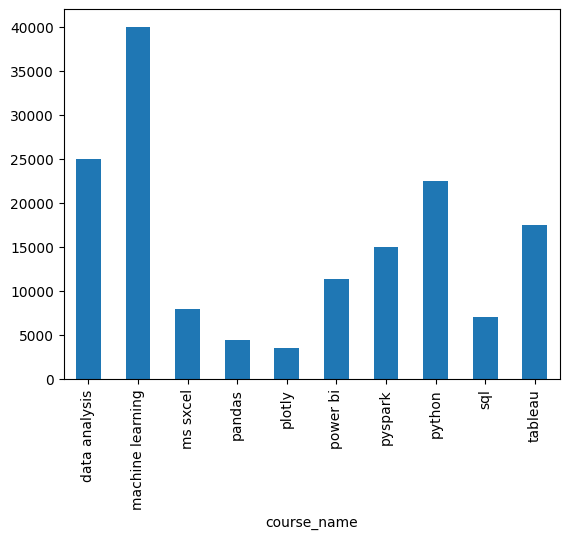

In [ ]:
# 4. Plot bar chart for revenue/course
regs.merge(courses,on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

In [ ]:
# 5. find students who enrolled in both the months
common_student_id = np.intersect1d(nov['student_id'],dec['student_id'])
common_student_id

array([ 1,  3,  7, 11, 16, 17, 18, 22, 23])

In [ ]:
students[students['student_id'].isin(common_student_id)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [ ]:
# 6. find course that got no enrollment
# courses['course_id']
# regs['course_id']

course_id_list = np.setdiff1d(courses['course_id'],regs['course_id'])
courses[courses['course_id'].isin(course_id_list)]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [ ]:
# 7. find students who did not enroll into any courses
student_id_list = np.setdiff1d(students['student_id'],regs['student_id'])
students[students['student_id'].isin(student_id_list)].shape[0]

(10/28)*100

35.714285714285715

In [ ]:
students

,student_id,name,partner
0,1,Kailash Harjo,23
1,2,Esha Butala,1
2,3,Parveen Bhalla,3
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
6,7,Tarun Thaker,9
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8


In [ ]:
# 8. Print student name -> partner name for all enrolled students
# self join
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

,name_x,name_y
0,Kailash Harjo,Chhavi Lachman
1,Esha Butala,Kailash Harjo
2,Parveen Bhalla,Parveen Bhalla
3,Marlo Dugal,Pranab Natarajan
4,Kusum Bahri,Lakshmi Contractor
5,Lakshmi Contractor,Aayushman Sant
6,Tarun Thaker,Nitika Chatterjee
7,Radheshyam Dey,Kusum Bahri
8,Nitika Chatterjee,Marlo Dugal
9,Aayushman Sant,Radheshyam Dey


In [ ]:
# 9. find top 3 students who did most number enrollments
regs.merge(students,on='student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: name, dtype: int64

In [ ]:
# 10. find top 3 students who spent most amount of money on courses
regs.merge(students,on='student_id').merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

In [ ]:
# Alternate syntax for merge
# students.merge(regs)

pd.merge(students,regs,how='inner',on='student_id')

,student_id,name,partner,course_id
0,1,Kailash Harjo,23,1
1,1,Kailash Harjo,23,6
2,1,Kailash Harjo,23,10
3,1,Kailash Harjo,23,9
4,2,Esha Butala,1,5
5,3,Parveen Bhalla,3,3
6,3,Parveen Bhalla,3,5
7,7,Tarun Thaker,9,8
8,7,Tarun Thaker,9,10
9,7,Tarun Thaker,9,7


In [ ]:
# IPL Problems

# find top 3 studiums with highest sixes/match ratio
# find orange cap holder of all the seasons

In [ ]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [ ]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
temp_df = delivery.merge(matches,left_on='match_id',right_on='id')

In [ ]:
six_df = temp_df[temp_df['batsman_runs'] == 6]

In [ ]:
# stadium -> sixes
num_sixes = six_df.groupby('venue')['venue'].count()

In [ ]:
num_matches = matches['venue'].value_counts()

In [ ]:
(num_sixes/num_matches).sort_values(ascending=False).head(10)

Holkar Cricket Stadium                                 17.600000
M Chinnaswamy Stadium                                  13.227273
Sharjah Cricket Stadium                                12.666667
Himachal Pradesh Cricket Association Stadium           12.000000
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium    11.727273
Wankhede Stadium                                       11.526316
De Beers Diamond Oval                                  11.333333
Maharashtra Cricket Association Stadium                11.266667
JSCA International Stadium Complex                     10.857143
Sardar Patel Stadium, Motera                           10.833333
Name: venue, dtype: float64

In [ ]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
632,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN


In [ ]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641
